In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

### 1) Tensor: 딥러닝의 기본단위
- Tensor의 핵심 기능
> 숫자 컨테이너  
> GPU 가속 기능
> 자동 미분(기울기) 추적 가능  
- Tensor의 형태
> 0계: 스칼라(하나의 파라미터, 손실값으로 사용됨)  
> 1계: 벡터(3,)(1 row형태, 가중치 묶음으로 사용)  
> 2계: 행렬
> 3계 이상: tensor(이미지, feature_map)

In [2]:
# 0계(스칼라)
r0 = torch.tensor(1.0, dtype=torch.float32)
print(type(r0)) # <class 'torch.Tensor'>
# 단일 수치값으로 만드는 item() 함수
r0 = r0.item()
print(type(r0)) # <class 'float'>

# 1계(벡터)
r1_np = np.array([1,2,3,4,5])
r1 = torch.tensor(r1_np, dtype=torch.float32)

# 2계(행렬)
r2_np = np.array([[1, 5, 6],
                  [4, 3, 2]])
r2 = torch.tensor(r2_np, dtype=torch.float32)

# 3계(텐서)
# [난수 생성 고정]
# 코드에서 난수가 torch에서 나오면 torch.manual_seed
# 난수가 numpy에서 나오면 np.random.seed
# 난수가 random에서 나오면 random.seed
torch.manual_seed(123)
# randn: mean=0, std=1인 난수 분포를 가지는 생성코드
r3 = torch.randn((3,2,2))
print(r3)

<class 'torch.Tensor'>
<class 'float'>
tensor([[[-0.1115,  0.1204],
         [-0.3696, -0.2404]],

        [[-1.1969,  0.2093],
         [-0.9724, -0.7550]],

        [[ 0.3239, -0.1085],
         [ 0.2103, -0.3908]]])


### 2) Tensor shape 변환
- .view()함수를 통해 텐서 형태를 변환 가능
- -1를 통해 크기 자동 설정

In [3]:
r3_2d = r3.view(3,-1) # shape = [3, 4]
r3_1d = r3.view(-1) # shape = [12]
print(r3_2d)
print(r3_1d)

tensor([[-0.1115,  0.1204, -0.3696, -0.2404],
        [-1.1969,  0.2093, -0.9724, -0.7550],
        [ 0.3239, -0.1085,  0.2103, -0.3908]])
tensor([-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
         0.3239, -0.1085,  0.2103, -0.3908])


### 3) Tensor의 AI에서의 핵심기능: Autograd-기울기 자동 계산
- AI학습이란, AI의 오차(손실)함수의 기울기를 계산하는것을 말한다.
- AI학습 흐름  
> [1]: 기울기에 영향을 미치는 파라미터 변수를 정의할때 requires_grad = True로 설정  
> [2]: 연산(순전파) 진행  
> [3]: backward()(역전파) 진행  
> [4]: grad로 미분값 확인  
> [5]: grad를 초가화하여 다음번에도 사용가능하게 세팅

/tmp/ipython-input-1782350618.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.plot(x_np, torch.tensor(y))


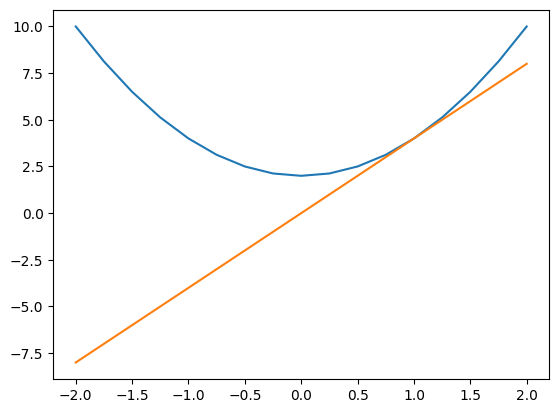

In [5]:
x_np = np.arange(-2, 2.1, 0.25)
x = torch.tensor(x_np, dtype=torch.float32, requires_grad=True)

y = 2*x**2 + 2

# backward(역전파)는 스칼라값에 대해서만 진행
# -> 즉, 손실값은 반드시 단일(스칼라)값이여만 한다
z = y.sum()
z.backward()

grad = x.grad # x에 대한 미분값


import matplotlib.pyplot as plt
plt.plot(x_np, torch.tensor(y))
plt.plot(x_np, grad)

In [6]:
# 다음 기울기 계산을 위해 gradient초기화
x.grad.zero_()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 4) Sigmoid함수
- 활성화 함수(비선형성 부여 함수)의 일종
- 결과값을 [0, 1]으로 제한함으로써 이진분류 점수로 결과를 치환하는 역할

/tmp/ipython-input-1622468067.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.plot(x_np, torch.tensor(y))


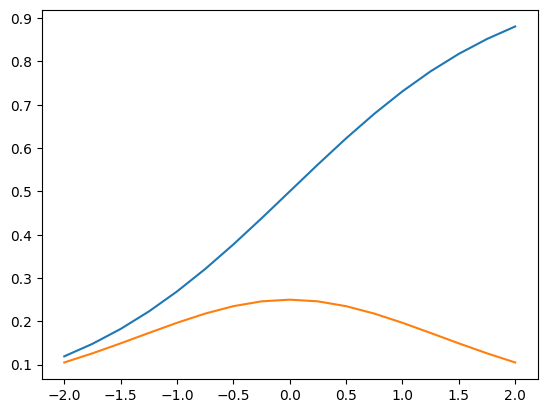

In [7]:
sigmoid = nn.Sigmoid()
y = sigmoid(x)
z = y.sum()

z.backward()
sig_grad = x.grad

plt.plot(x_np, torch.tensor(y))
plt.plot(x_np, sig_grad)

### 5) Loss Function(손실 함수)
- 실제 값(label)과 예측 값(pred)사이의 오차를 나타내는 함수
- 회귀(연속형 결과값): MSE(평균 제곱 오차)
- 분류(범주형 결과값): CrossEntropy

In [9]:
y_true = torch.tensor([3.0, 5.0, 2.0])
y_pred = torch.tensor([2.5, 4.5, 2.0])

mse_loss = nn.MSELoss()
loss = mse_loss(y_pred, y_true)
print(loss)

tensor(0.1667)


In [11]:
# (배치=5, 클래스=3) 로짓(logits)
logits = torch.randn(5, 3)

# 정답 레이블 (정수)
targets = torch.randint(0, 3, (5,))
# class 0, 1, 2에 대한 5개의 배치에 대한 값
print(logits)
print(targets)

ce_loss = nn.CrossEntropyLoss()
loss = ce_loss(logits, targets)
print(loss)

tensor([[-0.4015, -0.2906,  0.8057],
        [ 0.6833,  1.0849,  0.7581],
        [-0.7763,  0.0695, -0.4283],
        [ 1.5573,  1.0076,  0.8467],
        [ 1.1068, -0.8800,  0.0642]])
tensor([0, 0, 2, 2, 2])
tensor(1.4117)
